###Obrada informacija

#4. Laboratorijska vježba:  Multivarijatni financijski vremenski nizovi

*Prosinac 2023.*

##Upute

U ovoj bilježnici dana je priprema sa svim uputama za 4. laboratorijsku vježbu iz predmeta Obrada informacija - uz bilježnicu su dostupni i podatci u datoteci `prices.csv`.

Vaš zadatak je u bilježnicu na odgovarajuća mjesta dopisati kod Vašeg rješenja,.

**Riješenu bilježnicu potrebno je predati kao izvještaj u .pdf formatu na *Moodle* najkasnije do 14.1.2024. u 23:59h. Datoteka koju predajete se mora zvati *PrezimeImeJMBAG.pdf*.**



## Uvod

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne dnevne cijene 24 ETF-a (eng. *exchange traded fund*) koji prate određene dioničke, obvezničke ili druge indekse.

Oznaka | Naziv | Klasa imovine
--- | --- | ---
SPY | SPDR S&P 500 ETF Trust | Equity: U.S. - Large Cap
IEFA | iShares Core MSCI EAFE ETF | Equity: Developed Markets Ex-U.S. - Total Market
VWO | Vanguard FTSE Emerging Markets ETF | Equity: Emerging Markets - Total Market
EWJ | iShares MSCI Japan ETF | Equity: Japan - Total Market
XLF | Financial Select Sector SPDR Fund | Equity: U.S. Financials
XLK | Technology Select Sector SPDR Fund | Equity: U.S. Technology
XLV | Health Care Select Sector SPDR Fund | Equity: U.S. Health Care
XLY | Consumer Discretionary Select Sector SPDR Fund | Equity: U.S. Consumer Cyclicals
XLP | Consumer Staples Select Sector SPDR Fund | Equity: U.S. Consumer Non-cyclicals
XLU | Utilities Select Sector SPDR Fund | Equity: U.S. Utilities
XLI | Industrial Select Sector SPDR Fund | Equity: U.S. Industrials
XLE | Energy Select Sector SPDR Fund | Equity: U.S. Energy
XLC | Communication Services Select Sector SPDR Fund | Equity: U.S. Telecommunications
XLRE | Real Estate Select Sector SPDR Fund | Equity: U.S. Real Estate
XLB | Materials Select Sector SPDR Fund | Equity: U.S. Basic Materials
BND | Vanguard Total Bond Market ETF | Fixed Income: U.S. - Broad Market |  Broad-based Investment Grade
LQD | iShares iBoxx USD Investment Grade Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based Investment Grade
BNDX | Vanguard Total International Bond ETF | Fixed Income: Global Ex-U.S. - Broad Market |  Broad-based Investment Grade
SHV | iShares Short Treasury Bond ETF | Fixed Income: U.S. - Government |  Treasury Investment Grade Ultra-Short Term
HYG | iShares iBoxx USD High Yield Corporate Bond ETF | Fixed Income: U.S. - Corporate |  Broad-based High Yield
GLD | SPDR Gold Trust | Commodities: Precious Metals Gold
SLV | iShares Silver Trust | Commodities: Precious Metals Silver
PDBC | Invesco Optimum Yield Diversified Commodity Strategy No K-1 ETF | Commodities: Broad Market
USO | United States Oil Fund LP | Commodities: Energy Crude Oil

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, koristit ćemo aritmetičke povrate:

$R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$

gdje je $S(t)$ cijena vrijednosnice u danu $t$. U sklopu ove laboratorijske vježbe cilj je analizirati kretanje danih ETF-ova i izračunati glavne komponente (PCA) koje utječu na njihovu dinamiku. Laboratorijsku vježbu je potrebno riješiti unutar ove bilježnice i predati riješenu bilježnicu kao izvještaj.

In [1]:
import pandas as pd

prices = pd.read_csv('prices.csv')
prices.set_index('Time', inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()


,SPY,IEFA,VWO,EWJ,XLF,XLK,XLV,XLY,XLP,XLU,...,XLB,BND,LQD,BNDX,SHV,HYG,GLD,SLV,PDBC,USO
Time,,,,,,,,,,,,,,,,,,,,,
2019-01-02,231.492233,48.000053,33.417080,47.497765,21.776472,59.029892,78.483353,95.259102,44.591763,44.784126,...,46.068901,69.980576,97.039024,48.517841,101.234894,63.253788,121.330002,14.56,8.545244,78.800003
2019-01-03,225.968170,47.684727,32.893154,47.227894,21.286907,56.050797,76.889748,93.196533,44.335598,44.775520,...,44.762505,70.253906,97.081886,48.517841,101.271584,63.285011,122.430000,14.75,8.607411,79.599998
2019-01-04,233.537125,49.129986,33.932262,48.828522,21.994057,58.534962,79.183434,96.280815,45.280781,45.438545,...,46.522518,70.042305,97.021873,48.473194,101.299133,64.347198,121.440002,14.73,8.731748,81.440002
2019-01-07,235.378525,49.366474,34.002121,48.949490,22.021255,59.058445,79.487411,98.457954,45.218948,45.128563,...,46.685822,69.936508,97.030441,48.357071,101.299133,64.971985,121.860001,14.67,8.799566,82.320000
2019-01-08,237.589920,49.716839,34.194221,49.182148,22.039383,59.553371,80.104607,99.546509,45.634129,45.688255,...,47.175724,69.848312,97.244827,48.321350,101.289948,65.393723,121.529999,14.69,8.873038,84.000000


# Zadatak 1 - Računanje korelacijske matrice i matrice kovarijance povrata

1.1. U prvom zadatku ove laboratorijske vježbe potrebno je prvo iz danih cijena (gore učitanih u Pandas DataFrame) izračunati dnevne povrate za sve pojedine vrijednosnice (prateći formulu danu u uvodu).

Izračunajte srednje povrate i volatilnost (standardnu devijaciju povrata) za svaku pojedinu vrijednosnicu. Pri analizi srednjih povrata i volatilnosti, te se brojke često *anualiziraju* - to znači da se srednji povrati pomnože s $252$ (cca. broj trgovinskih dana u godini), a volatilnost s $\sqrt{252}$.

**Izračunajte anualizirane srednje povrate i volatilnosti. Sve ETF-ove prikažite u dijagramu raspršenja s volatilnošću na x-osi i srednjim povratom na y-osi.**

Razmislite - koji se ETF-ovi ističu po odnosu povrata i rizika (posebno dobri ili posebno loši kao investicije)?


C:\Users\Karlo\AppData\Local\Temp\ipykernel_18624\3305585970.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (annualized_volatility[i], annualized_returns[i]))


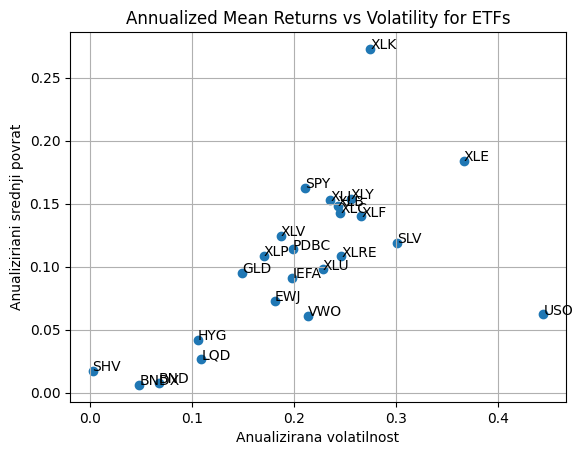

In [2]:
import numpy as np
import matplotlib.pyplot as plt

returns = prices.pct_change()
returns = returns.dropna()
annualized_returns = returns.mean() * 252
annualized_volatility = returns.std() * np.sqrt(252)

plt.scatter(annualized_volatility, annualized_returns)
plt.title('Annualized Mean Returns vs Volatility for ETFs')
plt.xlabel('Anualizirana volatilnost')
plt.ylabel('Anualiziriani srednji povrat')
plt.grid(True)
for i, txt in enumerate(annualized_returns.index):
    plt.annotate(txt, (annualized_volatility[i], annualized_returns[i]))
plt.show()


# ETF-ovi s niskom volatilnošću i visokim povratom mogu biti atraktivni za konzervativnije investitore.
# ETF-ovi s visokom volatilnošću i niskim povratom mogu biti manje privlačni i mogu nositi veći rizik za gubitak kapitala.

# Kao potencijalno zanimljivi ETF-ovi mogao bih se izdvojiti XLK zato jer ima najbolji odnos povrata i volatilnosti.
# Ukolik smo zbog manjeg rizika spremni na 40% manji povrat, zanimljiv nam postaje i SPY 

# S druge strane, USO se ističe kao ETF s najlošijim omjerom povrata i volatilnosti te bi ga trebalo izbjegavati.


1.2. Kovarijancu i korelaciju moguće je iz podataka izračunati koristeći Pandas, ali i NumPy ili neke druge biblioteke.

**Koristeći dnevne povrate, izračunajte matricu kovarijance $\Sigma$ i matricu korelacije $C$ povrata svih ETF-ova.
Matrice ispišite u konzolu ili vizualizirajte.**

Proučite strukturu matrice i razmislite o tome koje zajedničke komponente u podatcima možete očekivati.

Covariance Matrix (Σ):
               SPY          IEFA           VWO           EWJ           XLF  \
SPY   1.761574e-04  1.457528e-04  1.376812e-04  1.170823e-04  1.918401e-04   
IEFA  1.457528e-04  1.563030e-04  1.409613e-04  1.259424e-04  1.728926e-04   
VWO   1.376812e-04  1.409613e-04  1.815550e-04  1.112717e-04  1.534720e-04   
EWJ   1.170823e-04  1.259424e-04  1.112717e-04  1.299253e-04  1.357587e-04   
XLF   1.918401e-04  1.728926e-04  1.534720e-04  1.357587e-04  2.808551e-04   
XLK   2.158161e-04  1.701803e-04  1.706754e-04  1.387625e-04  2.036297e-04   
XLV   1.318726e-04  1.061152e-04  9.604616e-05  8.357183e-05  1.406268e-04   
XLY   1.934884e-04  1.614538e-04  1.574461e-04  1.310982e-04  1.994529e-04   
XLP   1.107683e-04  8.944329e-05  7.605146e-05  7.151245e-05  1.225315e-04   
XLU   1.274866e-04  1.049761e-04  8.575088e-05  8.290778e-05  1.461856e-04   
XLI   1.753387e-04  1.551730e-04  1.373171e-04  1.224394e-04  2.245905e-04   
XLE   1.907531e-04  1.835906e-04  1.73817

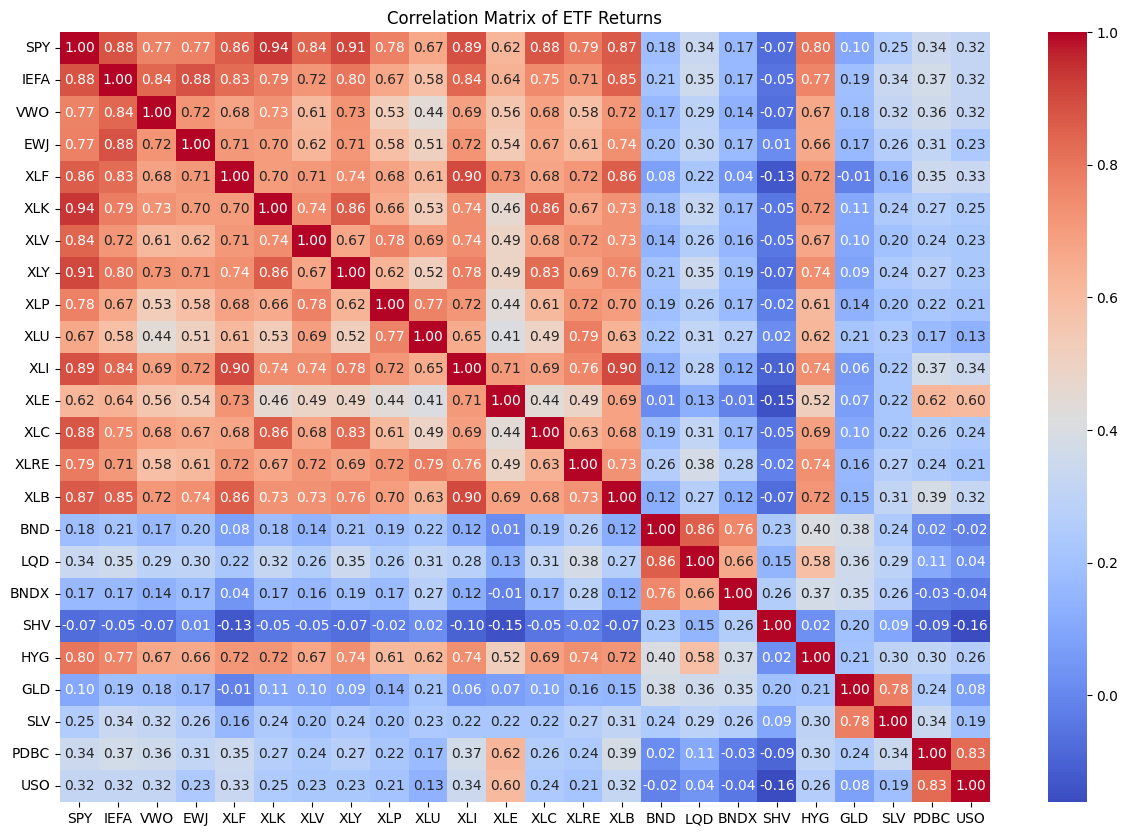

In [3]:
import seaborn as sns

covariance_matrix = returns.cov()

correlation_matrix = returns.corr()

print("Covariance Matrix (Σ):")
print(covariance_matrix)
print("\nCorrelation Matrix (C):")
print(correlation_matrix)

plt.figure(figsize=(15, 10))
plt.title('Correlation Matrix of ETF Returns')
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()



# Zadatak 2 - Analiza glavnih komponenti

2.1. Za analizu glavnih komponenti potrebno je izračunati svojstvenu dekompoziciju, koju možete pronaći u sklopu biblioteke NumPy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html.

**Izračunajte svojstvene vektore i pripadajuće svojstvene vrijednosti matrice kovarijance povrata $\Sigma$. Poredajte komponente padajući po svojstvenim vrijednostima i prikažite svojstvene vrijednosti grafički.**



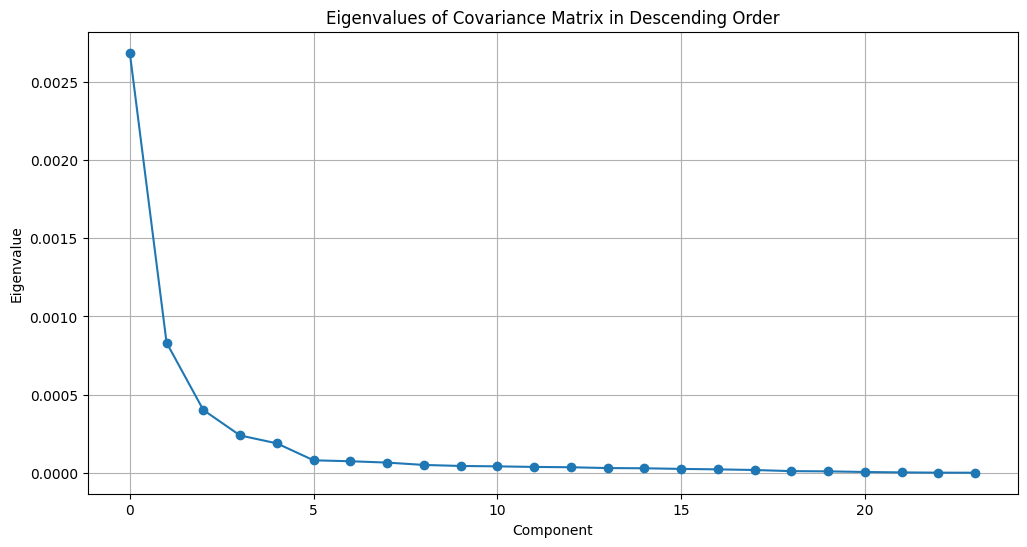

(array([2.68665277e-03, 8.31976027e-04, 4.01307581e-04, 2.38512955e-04,
        1.87916883e-04, 7.93705677e-05, 7.34527881e-05, 6.48461289e-05,
        4.98178157e-05, 4.32038374e-05, 4.07701847e-05, 3.70788113e-05,
        3.50096587e-05, 2.97918414e-05, 2.84744055e-05, 2.43922231e-05,
        2.15450339e-05, 1.73556808e-05, 1.02231492e-05, 8.74032562e-06,
        4.69766257e-06, 2.04639608e-06, 4.48673254e-07, 2.82416669e-08]),
 array([[ 2.42717418e-01,  1.17287156e-01, -3.91987690e-02,
          1.15221778e-01, -1.92222364e-03,  1.26123364e-01,
          6.56156151e-02, -2.98920495e-02, -4.57596024e-02,
          5.64810725e-02, -6.10510555e-02,  4.80980662e-02,
          1.70823040e-02, -1.31702095e-02,  6.36173326e-02,
          3.34027426e-03,  1.93214451e-02,  4.06824693e-03,
         -1.48280343e-02, -7.75647300e-03, -2.05670138e-02,
          1.40917665e-02,  9.35022568e-01, -1.63105228e-03],
        [ 2.17902110e-01,  7.89183996e-02,  2.66392647e-02,
          9.50598589e-03,

In [4]:
# Calculate eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Visualize the eigenvalues
plt.figure(figsize=(12, 6))
plt.plot(sorted_eigenvalues, marker='o')
plt.title('Eigenvalues of Covariance Matrix in Descending Order')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

sorted_eigenvalues, sorted_eigenvectors


2.2. **Izračunajte koliki udio varijance objašnjavaju prve tri komponente?**

In [5]:
total_variance = sum(sorted_eigenvalues)
variance_explained_first_three = sum(sorted_eigenvalues[:3]) / total_variance

print("Variance Explained by First Three Components: {:.2%}".format(variance_explained_first_three))

Variance Explained by First Three Components: 79.71%


2.3. Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti.  

**Prikažite grafički (npr. stupčastim dijagramom za svaku komponentu posebno) koeficijente prve 3 glavne komponente (elemente prva tri svojstvena vektora).**

S obzirom na to koje vrijednosnice opisuju prve tri komponente, razmislite možete li zaključiti kakve zajedničke faktore u tržištu opisuju razmatrane komponente?

NAPOMENA: pripazite na to što vraća funkcija koju koristite i u kojoj se dimenziji (stupac ili red) nalaze svojstveni vektori.

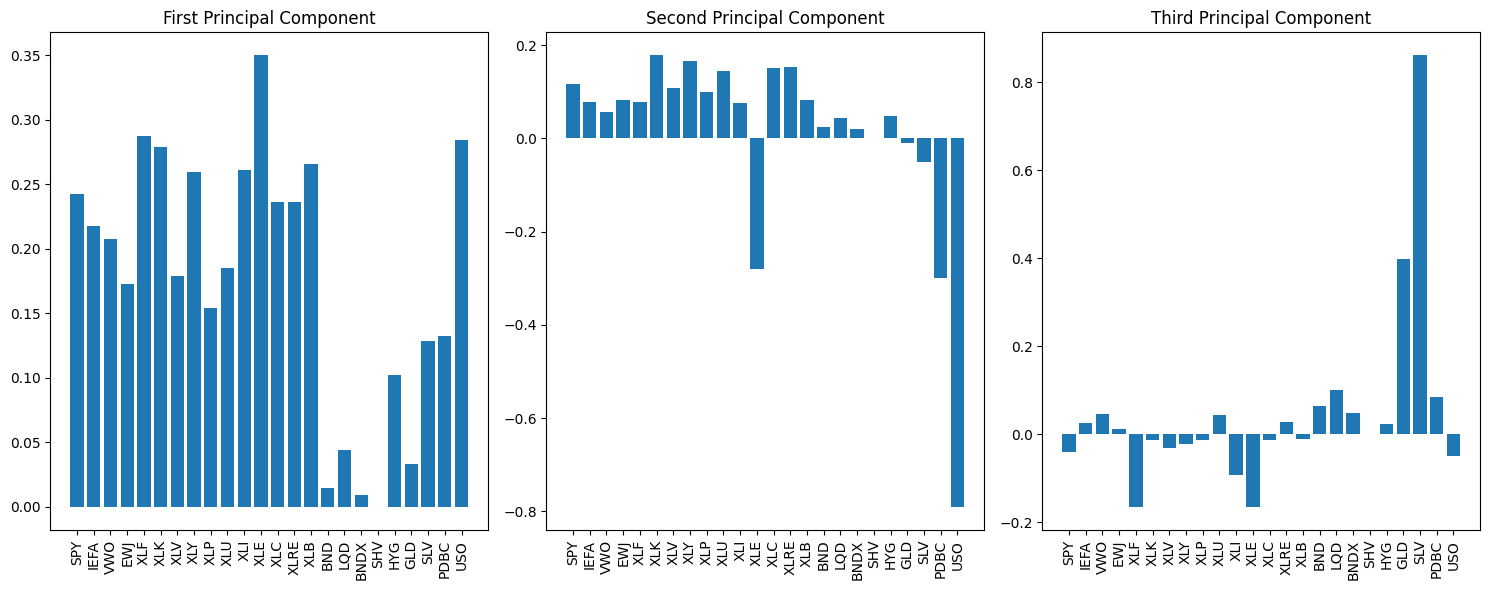

In [6]:
# Extract the first three eigenvectors
first_three_eigenvectors = sorted_eigenvectors[:, :3]

# Create bar plots for the coefficients of the first three principal components
plt.figure(figsize=(15, 6))

# Plot for the first principal component
plt.subplot(1, 3, 1)
plt.bar(range(len(first_three_eigenvectors)), first_three_eigenvectors[:, 0], tick_label=returns.columns)
plt.title('First Principal Component')
plt.xticks(rotation=90)

# Plot for the second principal component
plt.subplot(1, 3, 2)
plt.bar(range(len(first_three_eigenvectors)), first_three_eigenvectors[:, 1], tick_label=returns.columns)
plt.title('Second Principal Component')
plt.xticks(rotation=90)

# Plot for the third principal component
plt.subplot(1, 3, 3)
plt.bar(range(len(first_three_eigenvectors)), first_three_eigenvectors[:, 2], tick_label=returns.columns)
plt.title('Third Principal Component')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



*Prva komponenta: Ova komponenta ima dosta velike koeficijente za mnoge ETF-ove, što sugerira da ona hvata neki opći trend ili faktor koji utječe na većinu tržišta. To bi moglo biti nešto kao opće kretanje tržišta ili ekonomska klima koja utječe na sve ili većinu dionica.*

*Druga komponenta: Ovdje vidimo da određeni ETF-ovi imaju veće koeficijente, ali ne toliko kao u prvoj komponenti. Ovo bi moglo značiti da druga komponenta hvata nešto specifičnije, možda vezano za određene sektore ili regije. Drugim riječima, ova komponenta bi mogla predstavljati faktore koji utječu na određene vrste dionica, ali ne nužno na cijelo tržište. Također, pokazuje neke ETF-ove s velikim negativnim koeficijentima, što je zanimljivo. Ovo zapravo znači da ti ETF-ovi imaju jaku obrnutu vezu s onim što ta komponenta predstavlja.*

*Treća komponenta: Slično kao i druga, ali s još specifičnijim skupom ETF-ova koji imaju visoke koeficijente. Ovo bi moglo značiti da treća komponenta prikazuje još uži skup faktora, možda vezanih za određene vrste rizika, strategije ili čak specifične industrije.*


2.4. **Ponovite prethodnu analizu za matricu korelacije povrata $C$ (prikažite svojstvene vrijednosti, udio varijance i koeficijente pojedinih komponenti za prve tri komponente).**

Usporedite rezultate - mijenjaju li se interpretacije komponenti?

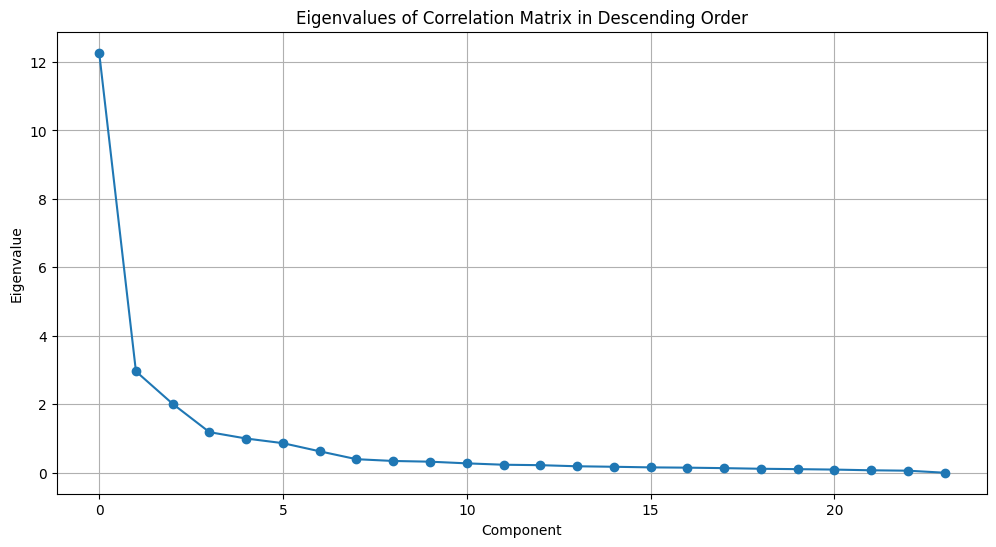

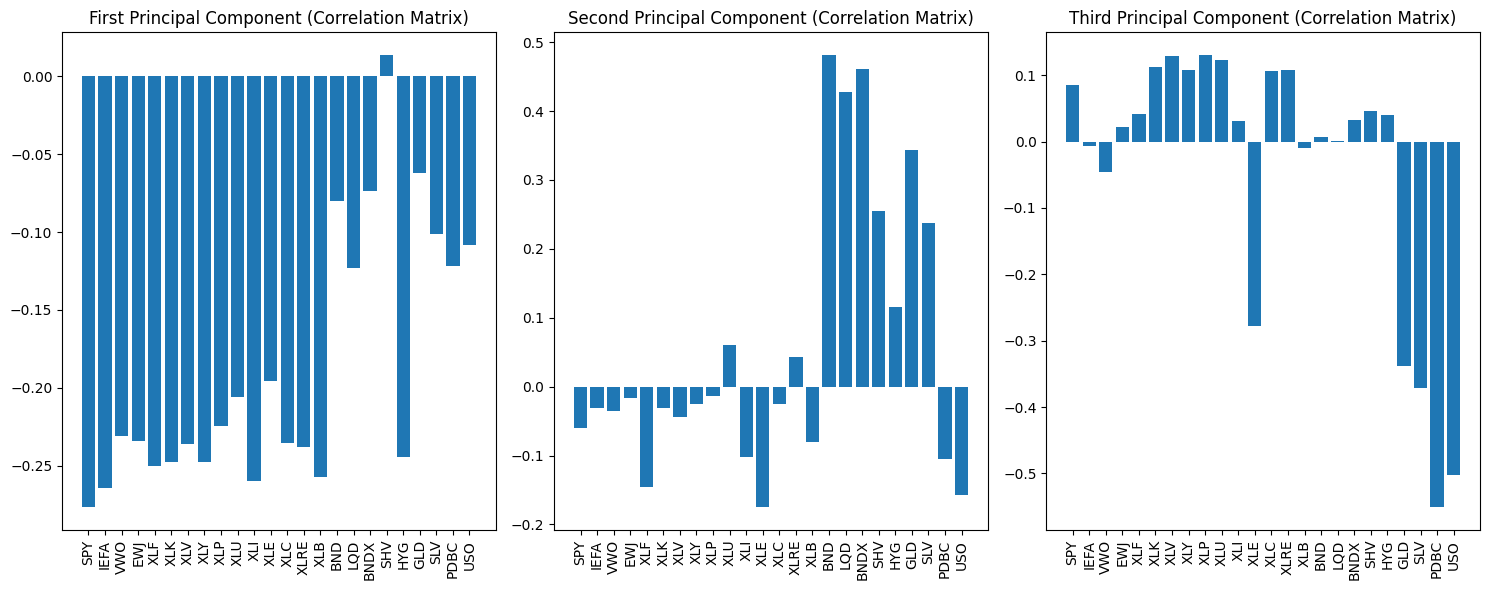

(0.7186037598887204,
 array([1.22699323e+01, 2.96295467e+00, 2.01360322e+00, 1.18735196e+00,
        1.00143306e+00, 8.65576176e-01, 6.27675797e-01, 3.97530473e-01,
        3.45783916e-01, 3.24897841e-01, 2.76070196e-01, 2.35837944e-01,
        2.22869191e-01, 1.90703448e-01, 1.76334517e-01, 1.58453188e-01,
        1.50328950e-01, 1.36322331e-01, 1.18049724e-01, 1.06644230e-01,
        9.41515496e-02, 7.32676508e-02, 6.18218163e-02, 2.40580290e-03]),
 array([[-2.76764448e-01, -5.94717264e-02,  8.59068060e-02,
         -1.30975062e-02,  7.22526158e-02, -1.54799607e-03,
         -1.54163490e-01, -9.26946092e-02,  2.92350631e-02,
          1.11340875e-01, -3.74812183e-03,  2.43602000e-03,
          3.61647774e-02, -1.73220333e-02,  5.41320983e-02,
         -4.12540357e-02,  6.29834806e-02,  7.59575301e-02,
          7.93796311e-02,  1.14675481e-01, -1.21115117e-02,
          2.21345208e-02,  9.82803514e-03,  9.08459500e-01],
        [-2.64095772e-01, -3.13236847e-02, -6.72360553e-03,
    

In [7]:
# Calculate eigenvalues and eigenvectors for the correlation matrix
correlation_eigenvalues, correlation_eigenvectors = np.linalg.eig(correlation_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_correlation_indices = np.argsort(correlation_eigenvalues)[::-1]
sorted_correlation_eigenvalues = correlation_eigenvalues[sorted_correlation_indices]
sorted_correlation_eigenvectors = correlation_eigenvectors[:, sorted_correlation_indices]

# Calculate the total variance explained by the first three components of the correlation matrix
total_correlation_variance = sum(sorted_correlation_eigenvalues)
variance_explained_first_three_correlation = sum(sorted_correlation_eigenvalues[:3]) / total_correlation_variance

# Extract the first three eigenvectors for the correlation matrix
first_three_correlation_eigenvectors = sorted_correlation_eigenvectors[:, :3]

# Visualize the eigenvalues for the correlation matrix
plt.figure(figsize=(12, 6))
plt.plot(sorted_correlation_eigenvalues, marker='o')
plt.title('Eigenvalues of Correlation Matrix in Descending Order')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Create bar plots for the coefficients of the first three principal components of the correlation matrix
plt.figure(figsize=(15, 6))

# Plot for the first principal component
plt.subplot(1, 3, 1)
plt.bar(range(len(first_three_correlation_eigenvectors)), first_three_correlation_eigenvectors[:, 0], tick_label=returns.columns)
plt.title('First Principal Component (Correlation Matrix)')
plt.xticks(rotation=90)

# Plot for the second principal component
plt.subplot(1, 3, 2)
plt.bar(range(len(first_three_correlation_eigenvectors)), first_three_correlation_eigenvectors[:, 1], tick_label=returns.columns)
plt.title('Second Principal Component (Correlation Matrix)')
plt.xticks(rotation=90)

# Plot for the third principal component
plt.subplot(1, 3, 3)
plt.bar(range(len(first_three_correlation_eigenvectors)), first_three_correlation_eigenvectors[:, 2], tick_label=returns.columns)
plt.title('Third Principal Component (Correlation Matrix)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

variance_explained_first_three_correlation, sorted_correlation_eigenvalues, sorted_correlation_eigenvectors



*Usporedbom rezultata PCA analize izvedene na matrici kovarijance i matrici korelacije, uočavamo da se interpretacije komponenti mogu razlikovati. S obzirom na to da matrica korelacije normalizira podatke (tako da svaka vrijednosnica ima jednaku varijancu), moguće je da ona bolje otkriva odnose koji nisu izravno povezani s razlikama u ukupnoj varijanci pojedinih vrijednosnica. To znači da matrica korelacije može pružiti uvid u suptilnije, međusobno neovisne tržišne faktore koji utječu na povrate ETF-ova.*
*Primjerice, dok matrica kovarijance može naglasiti odnose vođene zajedničkim trendovima i ukupnom tržišnom volatilnošću, matrica korelacije može istaknuti odnose koji su više povezani s relativnim kretanjima među vrijednosnicama. Stoga, iako oba pristupa pružaju vrijedne informacije, matrica korelacije može biti korisnija za razumijevanje suptilnijih, specifičnih tržišnih dinamika.*

# Zadatak 3 - Svojstveni portfelji

U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji.

Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Same težine svojstvenih portfelja mogu biti rotirane i skalirane u odnosu na elemente svojstvenih vektora.

U ovoj analizi ćemo pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:

$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.

Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.

Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:

$R_p = \sum{R_i w_i} = R\cdot w$.


**Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve tri glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta tri svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100).**



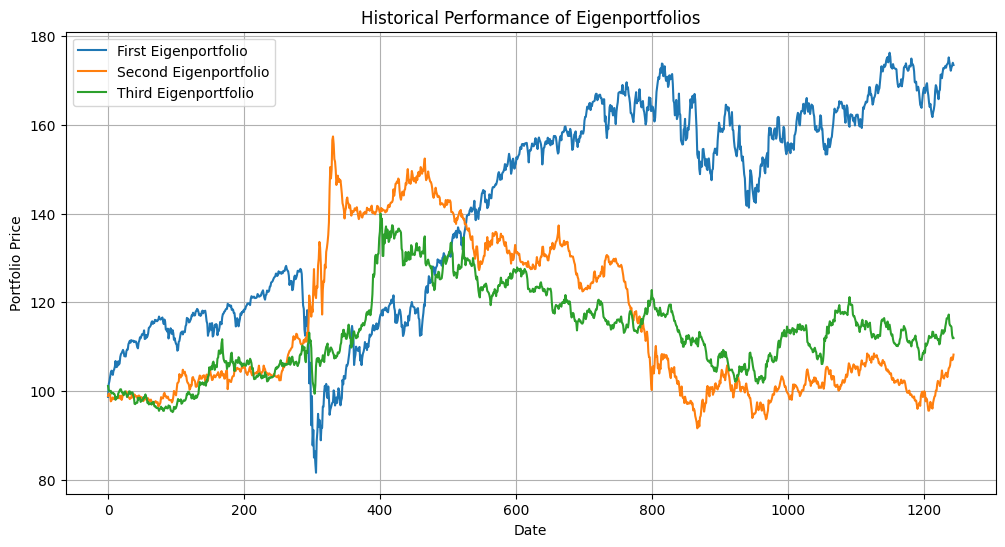

In [8]:
#Vaš kod ide ovdje

# Normalize the eigenvectors to create scaled eigenportfolios
scaled_eigenportfolios = first_three_eigenvectors / np.sum(np.abs(first_three_eigenvectors), axis=0)

# Calculate the historical returns for each eigenportfolio
historical_returns = np.dot(returns.fillna(0), scaled_eigenportfolios)

# Convert returns to prices (starting at 100)
initial_price = 100
portfolio_prices = np.cumprod(1 + historical_returns, axis=0) * initial_price

# Create a plot for the historical performance of each eigenportfolio
plt.figure(figsize=(12, 6))
plt.plot(portfolio_prices, label=['First Eigenportfolio', 'Second Eigenportfolio', 'Third Eigenportfolio'])
plt.title('Historical Performance of Eigenportfolios')
plt.xlabel('Date')
plt.ylabel('Portfolio Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Ako usporedite dobivene rezultate s kretanjem cijena originalnih vrijednosnica, vidjet ćete sličnosti između vrijednosnica koje pripadaju određenim klasama imovina i pojedinih svojstvenih portfelja. Svojstveni portfelji dakle predstavljaju niže-dimenzionalan prostor tzv. sintetičkih vrijednosnica (u našem slučaju 3 umjesto originalnih 24) koje najbolje opisuju cijeli razmatrani skup podataka. Dobra procjena tih komponenti je ključna u razumijevanju zajedničkog kretanja većih skupova dionica i upravljanju financijskim rizikom.

Razmislite što to znači za tržište koje smo analizirali - koji su glavni izvori rizika prevladavali u razmatranom periodu?

*Uspoređujući dobivene rezultate svojstvenih portfelja s kretanjem cijena originalnih vrijednosnica, možemo vidjeti sličnosti između određenih klasa imovina i pojedinih svojstvenih portfelja. Ovo ukazuje na to da svojstveni portfelji efektivno predstavljaju niže-dimenzionalan prostor sintetičkih vrijednosnica (u ovom slučaju 3, umjesto originalnih 24), koje najbolje opisuju cjelokupni skup podataka. Precizna procjena ovih komponenti ključna je za razumijevanje zajedničkog kretanja većih skupova dionica i za upravljanje financijskim rizikom.*

*Razmatrajući što ovo znači za tržište koje smo analizirali, zaključujemo da su glavni izvori rizika koji su prevladavali u razmatranom periodu vjerojatno vezani uz faktore koje su opisivale prve tri glavne komponente. Ovi faktori mogu uključivati specifične tržišne trendove, sektorske utjecaje, regionalne faktore, ili čak šire ekonomske indikatore u koje se u ovom trenutku ne razumijem previše. Zasigurno, prepoznavanje ovih izvora rizika može pomoći u boljem razumijevanju tržišnih uvjeta i trendova, te u stvaranju strategija za diverzifikaciju i smanjenje rizika.*